In [ ]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt
from arch import arch_model

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 907 kB 6.8 MB/s 


In [ ]:
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv",  index_col='Week')
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv",  index_col='Date')

In [ ]:
ts_dict = {'dowjones_closing': dowjones_closing,
           'female_births': female_births}

In [ ]:
def df_test(ts_dict):
  for key, value in ts_dict.items():
    p_value = adfuller(value, autolag='AIC')
    if p_value[1] > 0.05:
      print(f'Series: {key}, P value: {p_value[1]}, не отвергают гипотезу о нестационарности ряда')
    else:
      print(f'Series: {key}, P value: {p_value[1]}, отвергают гипотезу, ряд - стационарный')

In [ ]:
df_test(ts_dict)

Series: dowjones_closing, P value: 0.6224548515589733, не отвергают гипотезу о нестационарности ряда
Series: female_births, P value: 5.2434129901498554e-05, отвергают гипотезу, ряд - стационарный


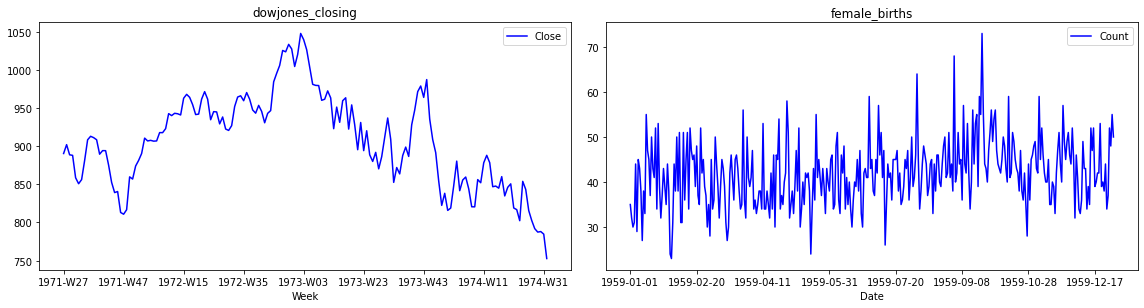

In [ ]:
plt.figure(figsize=(16, 12))
layout = (3, 2)
for i, key in enumerate(ts_dict.keys()):
    x = i % 2
    y = int((i - x) / 2)
        
    ts_ax = plt.subplot2grid(layout, (y, x))
    ts_dict[key].plot(ax=ts_ax, color='blue')
    ts_ax.set_title(key)
        
plt.tight_layout()

# GARCH

In [ ]:
djc = boxcox(ts_dict['dowjones_closing']['Close'], 0)
djc = djc[1:] - djc[:-1]

In [ ]:
p_value = adfuller(djc, autolag='AIC')
if p_value[1] > 0.05:
  print(f'P value: {p_value[1]}, не отвергают гипотезу о нестационарности ряда')
else:
  print(f'P value: {p_value[1]}, отвергают гипотезу, ряд - стационарный')

P value: 2.7516091322913448e-24, отвергают гипотезу, ряд - стационарный


In [ ]:
am = arch_model(djc)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     43,   Neg. LLF: 134.52964234498737
Iteration:     10,   Func. Count:     75,   Neg. LLF: -392.81242212133975
Optimization terminated successfully    (Exit mode 0)
            Current function value: -392.8124221213393
            Iterations: 11
            Function evaluations: 90
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                392.812
Distribution:                  Normal   AIC:                          -777.625
Method:            Maximum Likelihood   BIC:                          -765.299
                                        No. Observations:                  161
Date:                Sat, Dec 10 2022   Df Residuals:                      160
Time:      

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004889. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


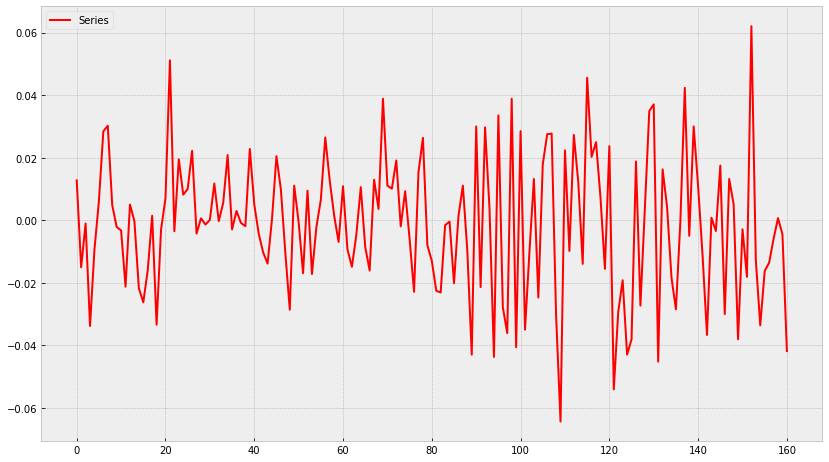

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plt.plot(res.resid, color='red', label='Series')
    plt.legend()
    plt.show()